### Risk Assment Tool

* Create tool that makes calls to an API from user generated inputs. 
* Ability to bring in data for all asset classes(Securities/Indicies, Foreign Indicies, Bonds,  Commodities/Futures, Cryptocurrency).
* Anaylze and compare each asset for risk assesment and output a dataframe and visualization.
* Generate overall score of the portfolio or each individual investment.
* Provide suggestion portfolios based on user risk tolerance. Create portfolio weights as percentages of assets(bonds, crypto, stock, etc)

#### Libraries

* pyvizenv
* os
* numpy
* pandas
* seaborn
* plotly
* panel
* %inline matplotlib

#### User Inputs

* What is your name?
* What is your email address?
* What's your risk tolerance? ( Drop down, Low, Moderate, High)

* What assets would you like to analyze? Can bring in multiples to create portfolio.

* What weights do you want to give to each asset

* Bring in assets and associated data, turn into dataframe and visualization

#### Data

* API - Yahoo Finance

#### Risk Assesments

https://blog.quantinsti.com/portfolio-analysis-performance-measurement-evaluation/

https://www.investopedia.com/terms/m/modernportfoliotheory.asp

https://www.investopedia.com/articles/investing/032415/how-investment-risk-quantified.asp

https://www.quantopian.com/lectures/position-concentration-risk

https://blog.quantinsti.com/tag/python-for-trading/

* Calculation of Portfolio Returns
* Time-Weighted Rate of Return(TWRR)
* Money-Weighted Rate of Return (MWRR)
* Portfolio Return Components
* Performance Attribution
---
* Alpha and Beta Ratios
* Capital Asset Pricing Model(CAPM)
* R-Squared
* Standard Deviation(STD)
* Sharpe Ratio
* Efficient Fronteirs
* Value at Risk
* Variance
* Correlation
---
* How do we determine which assesments should carry more weight or should they all be equal?
* How do we create a program that can create a portfolio that best fits your risk tolerance and investment goals?
* Run all assets under total risk assesment and anything that meets a specific range/criteria falls into its specific category
* If you create a portfolio that doesn't meet your risk tolerance, we will let you know which assets are high/low based on your tolerance

### Risk Tolerances

* Pick top 10 best performing assets over the last 3 or 5 years

* Low - Bonds, Dividend Stocks, REITS, ETF's, Mutual Funds, Govt Bond ETFs, Small-Cap Value Index Fund
* Moderate - Dividend Stocks, REITs, ETFs, BTC, Precious Metals
* High - Top 10 Market Cap Cryptos, IPOs, Dividned Stocks, ETFs, Precious Metals, Emerging Market ETFs

* Spedometer guage for total score
* Sector/SPDRs breakdowns
* If created portfolio has multiple assets from same sector, then tell them it's too correlated and should diversify to spread risk

---

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime
import panel as pn
import holoviews as hv
import os
import hvplot.pandas
import plotly.express as px
from dotenv import load_dotenv
from scipy import stats
import seaborn as sns
%matplotlib inline
import yfinance as yf
import ipywidgets as widget
from ipywidgets import interact
yf.pdr_override()

plt.rcParams['figure.figsize'] = [20,10]
sns.set(rc={'figure.figsize': (20,10)})

datetime.date.today().strftime('%Y-%m-%d' )

start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-1095))
end_date = datetime.date.today().strftime('%Y-%m-%d')

sp500 = pdr.get_data_yahoo('^GSPC', start_date, end_date)
sp500 = sp500[['Adj Close']].round(2)

[*********************100%***********************]  1 of 1 completed


In [3]:
style = {'description_width': 'initial'}
name_f = widget.Text(placeholder='Type Here', description='Name:', disabled=False)


email_f = widget.Text(placeholder='Type Here', description='Email Address:', style=style, disabled=False)

style = {'description_width': 'initial'}
risk_f = widget.Dropdown(
    options=[('Low', 1), ('Moderate', 2), ('High', 3)],
    value=1,
    description='Risk Tolerance:',
    style=style,
)

style = {'description_width': 'initial'}
tickers_f = widget.Text(placeholder='Type Here', description='Enter tickers, comma separated:', style=style, disabled=False)

display(name_f)
display(email_f)
display(risk_f)
display(tickers_f)

Text(value='', description='Name:', placeholder='Type Here')

Text(value='', description='Email Address:', placeholder='Type Here', style=DescriptionStyle(description_width…

Dropdown(description='Risk Tolerance:', options=(('Low', 1), ('Moderate', 2), ('High', 3)), style=DescriptionS…

Text(value='', description='Enter tickers, comma separated:', placeholder='Type Here', style=DescriptionStyle(…

In [4]:
name = name_f.value
email = email_f.value
risk = risk_f.value
tickers = tickers_f.value

In [4]:
print(name)
print(email)
print(risk)
tickers = [t.lstrip() for t in tickers.upper().split(',')]



1


In [5]:
tickers

['']

In [6]:
wt = [100/len(tickers) for i in tickers]

In [7]:
from finquant.portfolio import build_portfolio
names = tickers
pf = build_portfolio(names=names, data_api="yfinance")

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- : No data found for this date range, symbol may be delisted


AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
pf.properties()


#### Efficient Frontiers

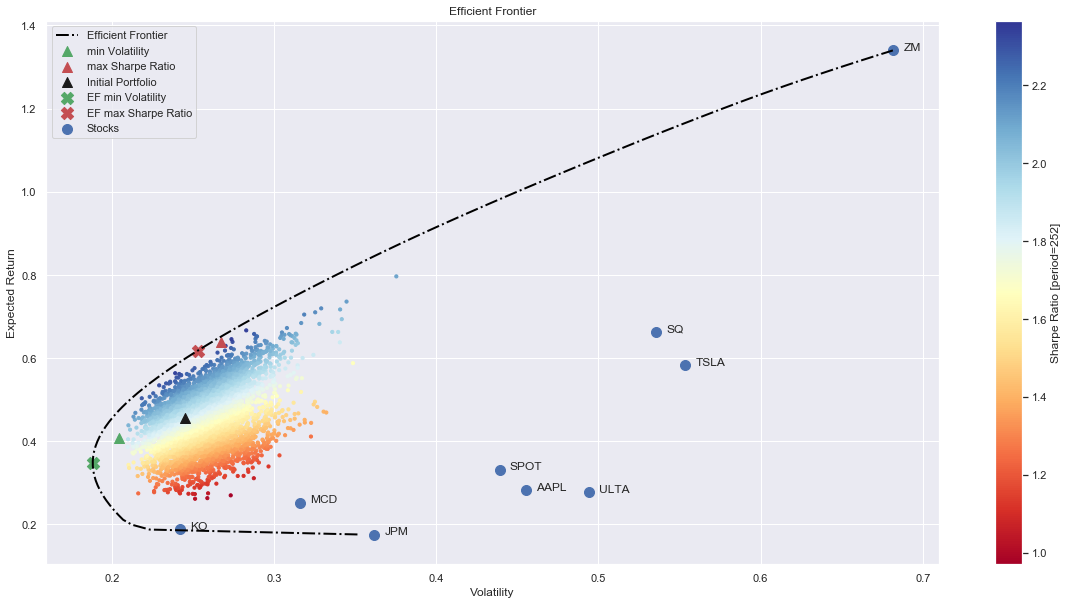

In [234]:
opt_w, opt_res = pf.mc_optimisation(num_trials=5000)
pf.mc_plot_results()
# minimisation to compute efficient frontier and optimal portfolios along it
pf.ef_plot_efrontier()
pf.ef.plot_optimal_portfolios()
# plotting individual stocks
pf.plot_stocks()
plt.show()


In [235]:
wt

[11.11111111111111,
 11.11111111111111,
 11.11111111111111,
 11.11111111111111,
 11.11111111111111,
 11.11111111111111,
 11.11111111111111,
 11.11111111111111,
 11.11111111111111]

In [236]:
risk_free_rate = .005

In [237]:
# Import Benchmark Data(SP500)
sp500.rename(columns={"Adj Close": "S&P 500"},inplace=True)
sp500.head()

,S&P 500
Date,
2017-08-21,2428.37
2017-08-22,2452.51
2017-08-23,2444.04
2017-08-24,2438.97
2017-08-25,2443.05


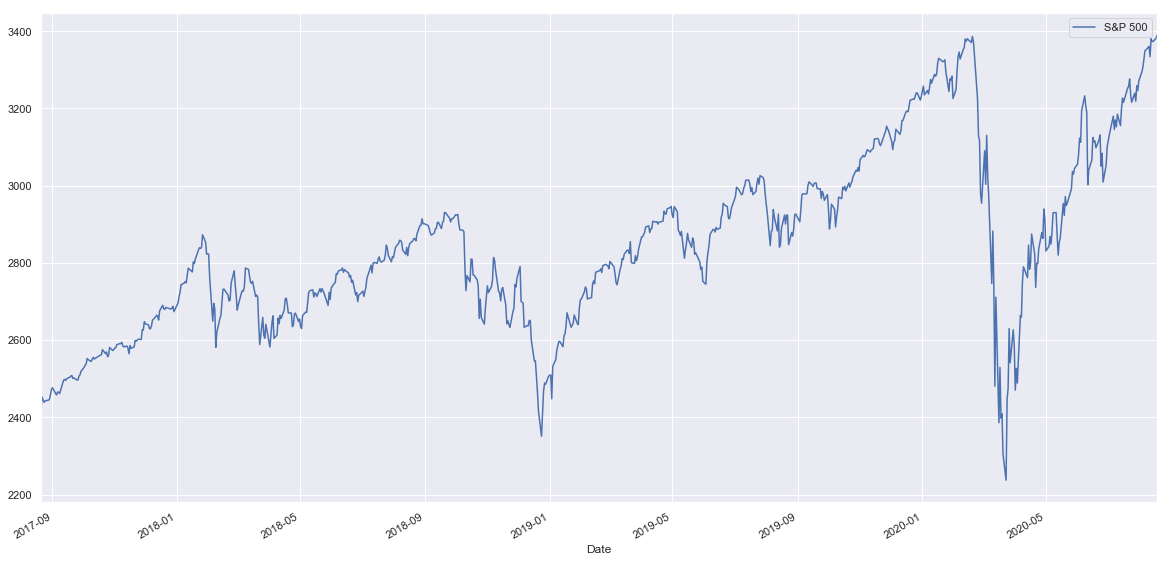

In [238]:
#Plot SP500
sp500.plot()
plt.show()

In [239]:
sp500_df = sp500.pct_change()[1:]
sp500_df.head()

,S&P 500
Date,
2017-08-22,0.009941
2017-08-23,-0.003454
2017-08-24,-0.002074
2017-08-25,0.001673
2017-08-28,0.000487


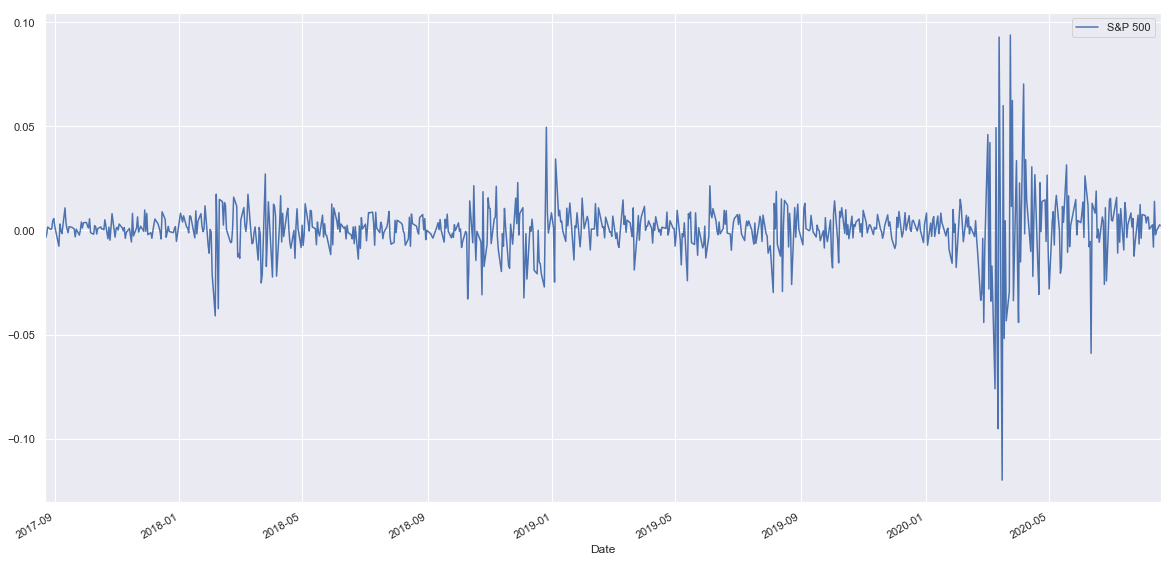

In [240]:
# Plot STD of SP500
sp500_df.plot()
plt.show()

In [241]:
# STD of SP500
sp_std = sp500.std()
sp_std

S&P 500    224.682856
dtype: float64

In [242]:
assets = pdr.get_data_yahoo(tickers, start_date, end_date)
assets = assets['Adj Close'].round(2)

assets.head()

[*********************100%***********************]  9 of 9 completed


,AAPL,JPM,KO,MCD,SPOT,SQ,TSLA,ULTA,ZM
Date,,,,,,,,,
2017-08-21,151.00,83.19,41.37,147.12,NaN,24.46,337.86,234.21,NaN
2017-08-22,153.47,84.04,41.30,148.31,NaN,25.34,341.35,231.65,NaN
2017-08-23,153.66,84.14,41.24,147.54,NaN,25.48,352.77,232.06,NaN
2017-08-24,152.98,84.01,41.13,147.17,NaN,25.66,352.93,233.71,NaN
2017-08-25,153.55,84.35,41.27,147.55,NaN,24.99,348.05,212.36,NaN


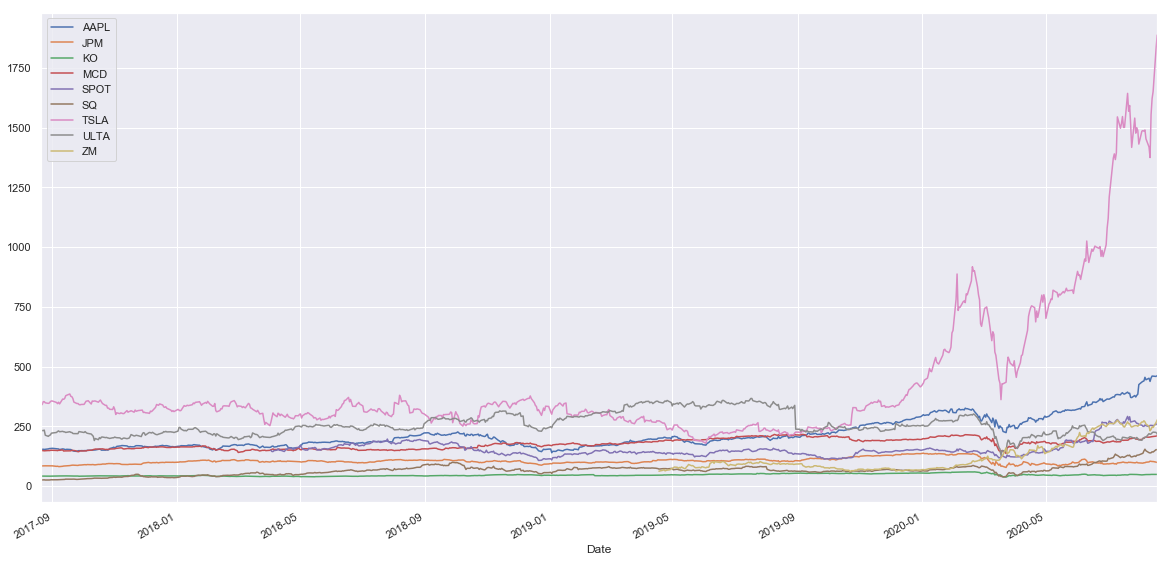

In [243]:
assets.plot()
plt.show()

In [244]:
daily_returns= assets.pct_change()[1:]
daily_returns.head()

,AAPL,JPM,KO,MCD,SPOT,SQ,TSLA,ULTA,ZM
Date,,,,,,,,,
2017-08-22,0.016358,0.010218,-0.001692,0.008089,NaN,0.035977,0.010330,-0.010930,NaN
2017-08-23,0.001238,0.001190,-0.001453,-0.005192,NaN,0.005525,0.033455,0.001770,NaN
2017-08-24,-0.004425,-0.001545,-0.002667,-0.002508,NaN,0.007064,0.000454,0.007110,NaN
2017-08-25,0.003726,0.004047,0.003404,0.002582,NaN,-0.026111,-0.013827,-0.091353,NaN
2017-08-28,0.010094,-0.003201,-0.003150,0.005354,NaN,-0.003201,-0.006867,-0.021708,NaN


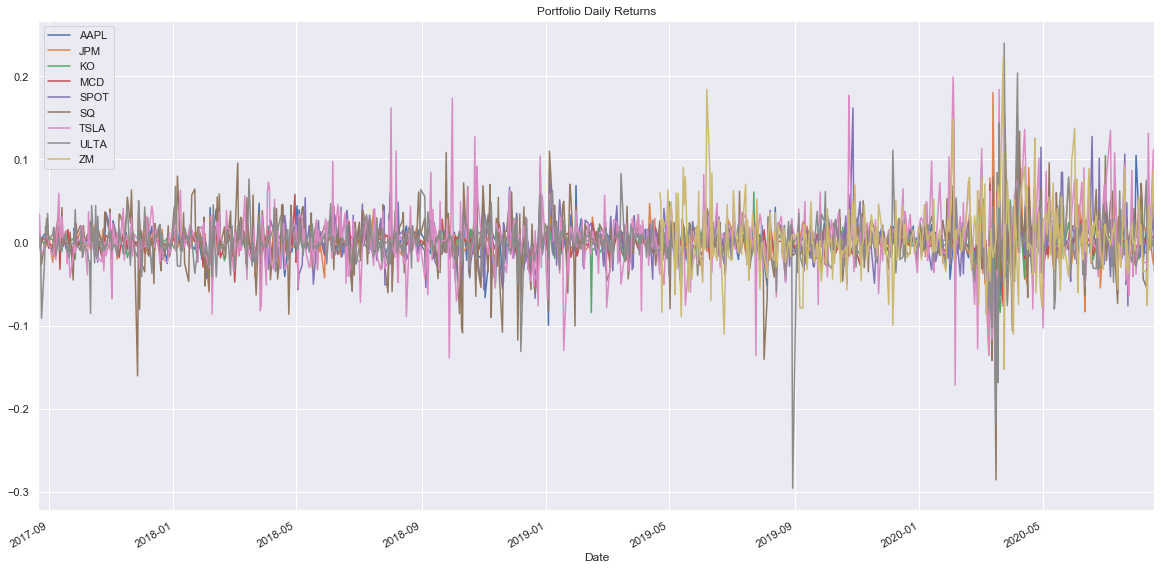

In [245]:
# Daily Returns for Portfolio
dr = daily_returns.plot()
dr.set_title('Portfolio Daily Returns')
plt.show()

In [246]:
# Weighted Returns
weighted_returns = (wt * daily_returns)
weighted_returns.head()

,AAPL,JPM,KO,MCD,SPOT,SQ,TSLA,ULTA,ZM
Date,,,,,,,,,
2017-08-22,0.181751,0.113529,-0.018801,0.089874,NaN,0.399746,0.114775,-0.121448,NaN
2017-08-23,0.013756,0.013221,-0.016142,-0.057687,NaN,0.061387,0.371727,0.019666,NaN
2017-08-24,-0.049171,-0.017167,-0.029637,-0.027864,NaN,0.078493,0.005039,0.079003,NaN
2017-08-25,0.041400,0.044968,0.037820,0.028689,NaN,-0.290119,-0.153634,-1.015028,NaN
2017-08-28,0.112160,-0.035566,-0.035000,0.059490,NaN,-0.035570,-0.076298,-0.241205,NaN


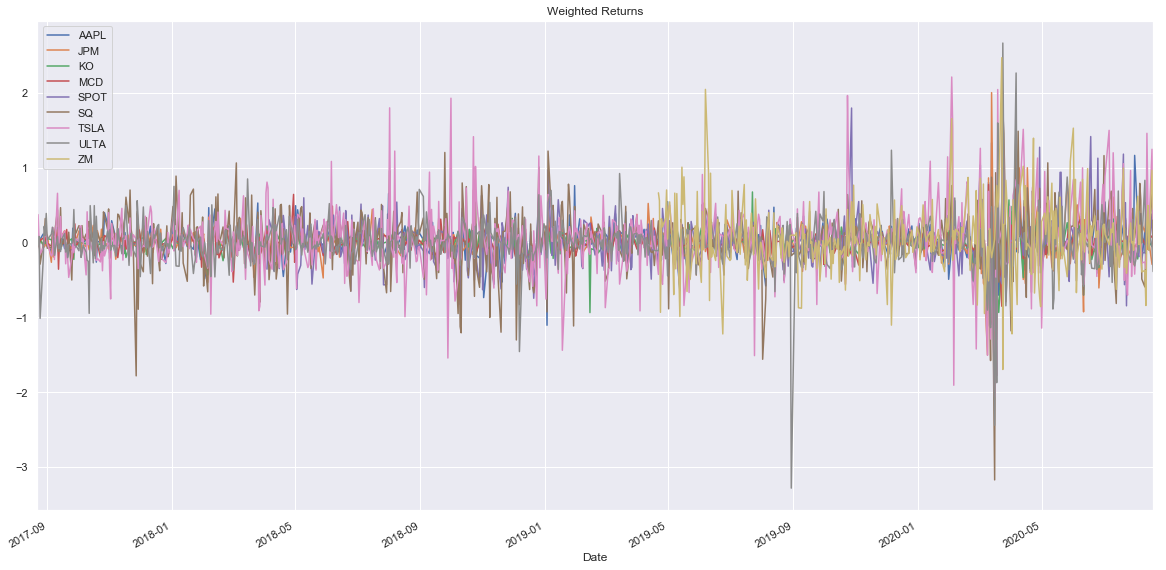

In [247]:
wr = weighted_returns.plot()
wr.set_title('Weighted Returns')
wr
plt.show()

In [248]:
portfolio = weighted_returns.sum(axis=1)
custom_portfolio = (portfolio + 1).cumprod()
custom_portfolio= pd.DataFrame(custom_portfolio).rename(columns={0 : 'Custom Portfolio'})

custom_portfolio.head()

,Custom Portfolio
Date,
2017-08-22,1.759425
2017-08-23,2.473624
2017-08-24,2.569344
2017-08-25,-0.785971
2017-08-28,-0.587916


In [249]:
all_returns =  pd.concat([daily_returns, sp500_df], axis='columns', join='inner')
all_returns.head()

,AAPL,JPM,KO,MCD,SPOT,SQ,TSLA,ULTA,ZM,S&P 500
Date,,,,,,,,,,
2017-08-22,0.016358,0.010218,-0.001692,0.008089,NaN,0.035977,0.010330,-0.010930,NaN,0.009941
2017-08-23,0.001238,0.001190,-0.001453,-0.005192,NaN,0.005525,0.033455,0.001770,NaN,-0.003454
2017-08-24,-0.004425,-0.001545,-0.002667,-0.002508,NaN,0.007064,0.000454,0.007110,NaN,-0.002074
2017-08-25,0.003726,0.004047,0.003404,0.002582,NaN,-0.026111,-0.013827,-0.091353,NaN,0.001673
2017-08-28,0.010094,-0.003201,-0.003150,0.005354,NaN,-0.003201,-0.006867,-0.021708,NaN,0.000487


In [250]:
comb_returns = pd.concat([custom_portfolio, sp500_df], axis='columns', join='inner')
comb_returns.head()

,Custom Portfolio,S&P 500
Date,,
2017-08-22,1.759425,0.009941
2017-08-23,2.473624,-0.003454
2017-08-24,2.569344,-0.002074
2017-08-25,-0.785971,0.001673
2017-08-28,-0.587916,0.000487


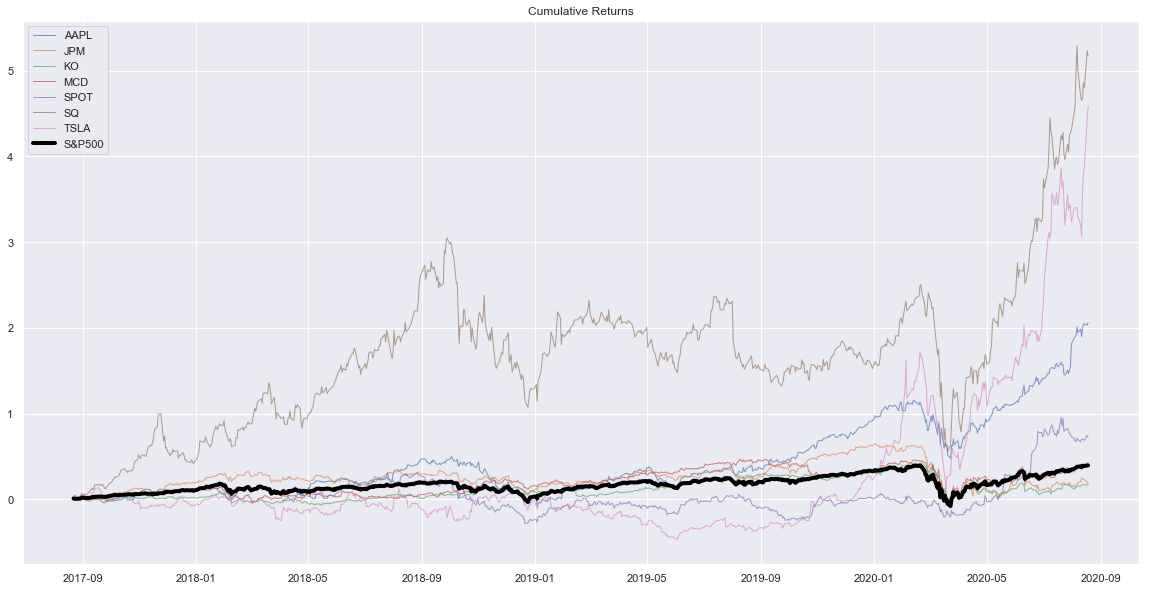

In [251]:
# Cumulative Returns of Portfolio
cumulative_returns=(1+all_returns).cumprod()-1
plt.figure()
plt.plot(cumulative_returns.iloc[:, 0:7], linewidth=1, alpha=0.7)
plt.plot(cumulative_returns.iloc[:,-1], label="S&P500", linewidth=4, color='black', alpha=1) # Second plot combines first and second together
cols = list(cumulative_returns.iloc[:, 0:7].columns)
cols.append("S&P500")
plt.legend(cols)
#cr= cumulative_returns.iloc[:, -1].plot(figsize=(20,10))
plt.title('Cumulative Returns')
plt.show()

#### Standard Deviation
* The standard deviation is a statistic that measures the dispersion of a dataset relative to it's mean and is calculated as the square root of the variance.

In [252]:
daily_std = daily_returns.std()
daily_std

AAPL    0.020656
JPM     0.021304
KO      0.014396
MCD     0.017183
SPOT    0.027673
SQ      0.036360
TSLA    0.040066
ULTA    0.030249
ZM      0.043008
dtype: float64

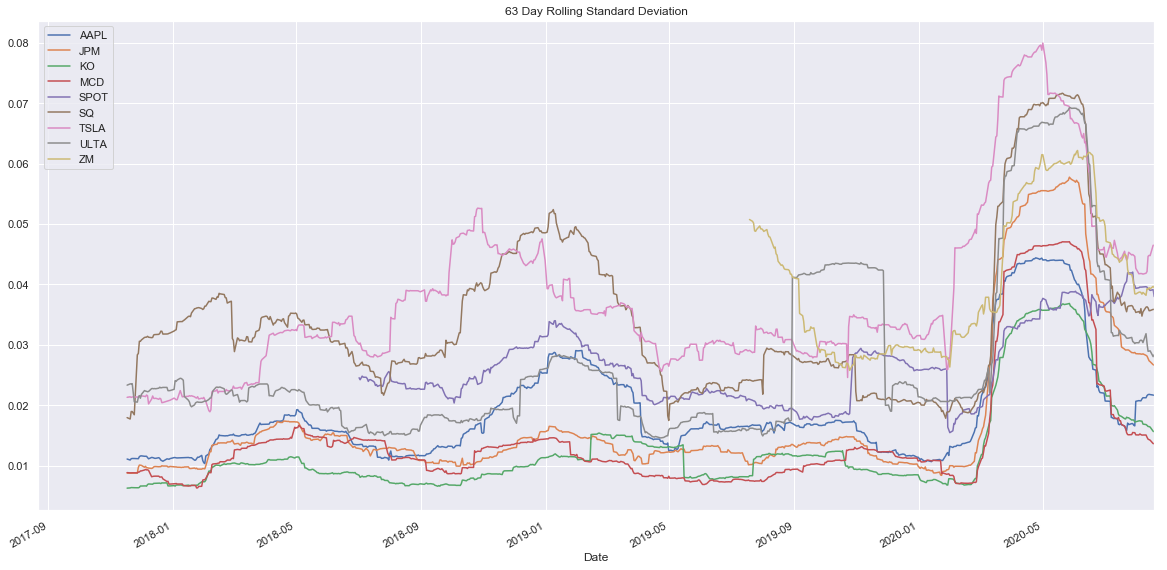

In [253]:
ds = daily_returns.rolling(window=63).std().plot()
ds.set_title('63 Day Rolling Standard Deviation')
plt.show()

#### Sharpe Ratio
* The Sharpe Ratio is used to understand the return of an investment compared to it's risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk
* Sharpe Ratio = return of portfolio - risk-free rate / STD of portfolios excess returns

In [254]:
# Calculate individual sharpe ratios
sharpe_ratios = (daily_returns.mean()*252) / (daily_returns.std()*np.sqrt(252))
sharpe_ratios.sort_values()

ULTA    0.191624
JPM     0.334460
KO      0.345684
MCD     0.574548
SPOT    0.738306
TSLA    1.221197
AAPL    1.306671
SQ      1.352205
ZM      1.982179
dtype: float64

#### Sortino Ratio
* The Sortino Ratio is a variation of the Sharpe Ratio that differentiates harmful volatility from total overall volatility by using the asset's STD of the negative portfolio returns downside deviation instead of total STD of portfolio returns.
* Sortino Ratio = Actual/Expected porfolio return - Risk-free rate / STD of the downside

In [255]:
ab = pd.DataFrame(custom_portfolio)
rfr = 0
target = 0
ab.loc[ab['Custom Portfolio'] < target, 'downside_returns'] = ab['Custom Portfolio']**2
#downside_returns = df.loc[df['Custom Portfolio']]
expected_return = ab['Custom Portfolio'].mean()
down_stdev = np.sqrt(ab['downside_returns'].mean())
sortino_ratio = (expected_return - rfr)/down_stdev
print(sortino_ratio)

0.17348711231953257


#### Variance
* Variance is a statistical measurement of the spread between numbers in a data set. It measures how far each number is from the mean and every number in the set. 
* variance = Epsilon(i data point in data set - population mean)sq / Number of data points in population

In [256]:
assets.var()

AAPL     4384.879940
JPM       146.001117
KO         22.934267
MCD       456.340657
SPOT     1210.324783
SQ        471.960217
TSLA    85658.719207
ULTA     2356.740991
ZM       4044.718300
dtype: float64

#### Correlation Coefficient

* Correlation coefficient is a statistical measure of strength of the relationship between relative movements of two variables. 
* Values range between -1.0 and 1.0
* A correlation of -1.0 shows a perfect negative correlation and a correlation of 1.0 shows a perfect positive correlation. 
* pxy = Covariance(x,y) / std(x) and std(y)

In [260]:
correlation =  daily_returns.corr()
cm = sns.light_palette("green", as_cmap=True)
s = correlation.style.background_gradient(cmap=cm)
s

,AAPL,JPM,KO,MCD,SPOT,SQ,TSLA,ULTA,ZM
AAPL,1,0.566971,0.454709,0.495421,0.395523,0.564651,0.395564,0.369367,0.0380577
JPM,0.566971,1,0.587411,0.591987,0.272939,0.453864,0.304067,0.492931,-0.151978
KO,0.454709,0.587411,1,0.541216,0.146468,0.327424,0.239994,0.34534,-0.0739672
MCD,0.495421,0.591987,0.541216,1,0.264151,0.412784,0.350698,0.545073,-0.143652
SPOT,0.395523,0.272939,0.146468,0.264151,1,0.432008,0.313745,0.2182,0.126447
SQ,0.564651,0.453864,0.327424,0.412784,0.432008,1,0.381454,0.397069,0.19892
TSLA,0.395564,0.304067,0.239994,0.350698,0.313745,0.381454,1,0.294634,0.167892
ULTA,0.369367,0.492931,0.34534,0.545073,0.2182,0.397069,0.294634,1,-0.121437
ZM,0.0380577,-0.151978,-0.0739672,-0.143652,0.126447,0.19892,0.167892,-0.121437,1


#### Heatmap Showing Correlation between stocks in your portfolio

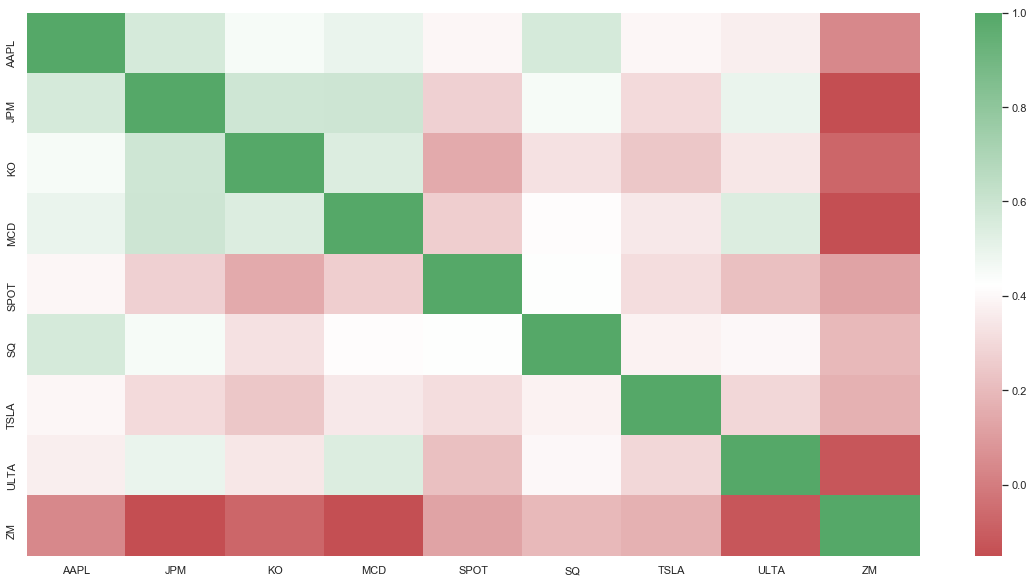

In [261]:
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 
ax = sns.heatmap(correlation, cmap=cmap)

#### Beta
* Beta is a measure of volatility or systematic risk of a security portfolio compared to the market as a whole.
* Beta = Covariance(return of individual stock, return on overall market) / Variance(return of overall market)

Text(0.5, 1.0, 'Beta')

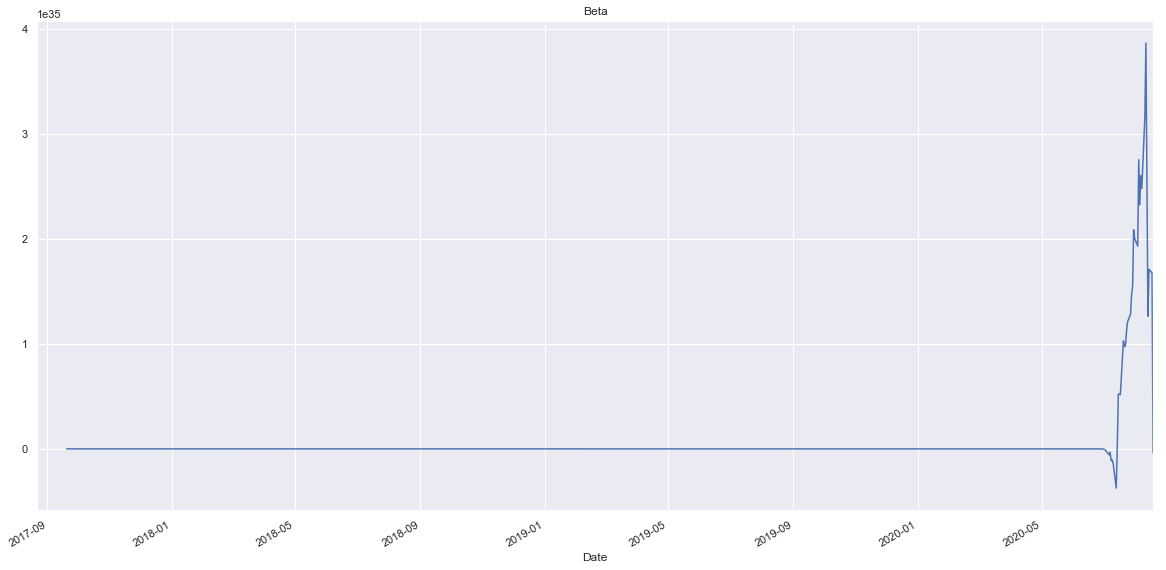

In [262]:
# Calculate covariance & rolling covariance
covariance = comb_returns['Custom Portfolio'].cov(comb_returns['S&P 500'])
rolling_covariance = comb_returns['Custom Portfolio'].rolling(window=21).cov(comb_returns['S&P 500'])

# Calculate variance & rolling variance
variance = comb_returns['S&P 500'].var()
rolling_variance = comb_returns['S&P 500'].rolling(window=21).var()

# Calculate beta 
beta = rolling_covariance / rolling_variance

# Plot beta
ae = beta.plot()
ae.set_title('Beta')

[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  1 of 1 completed


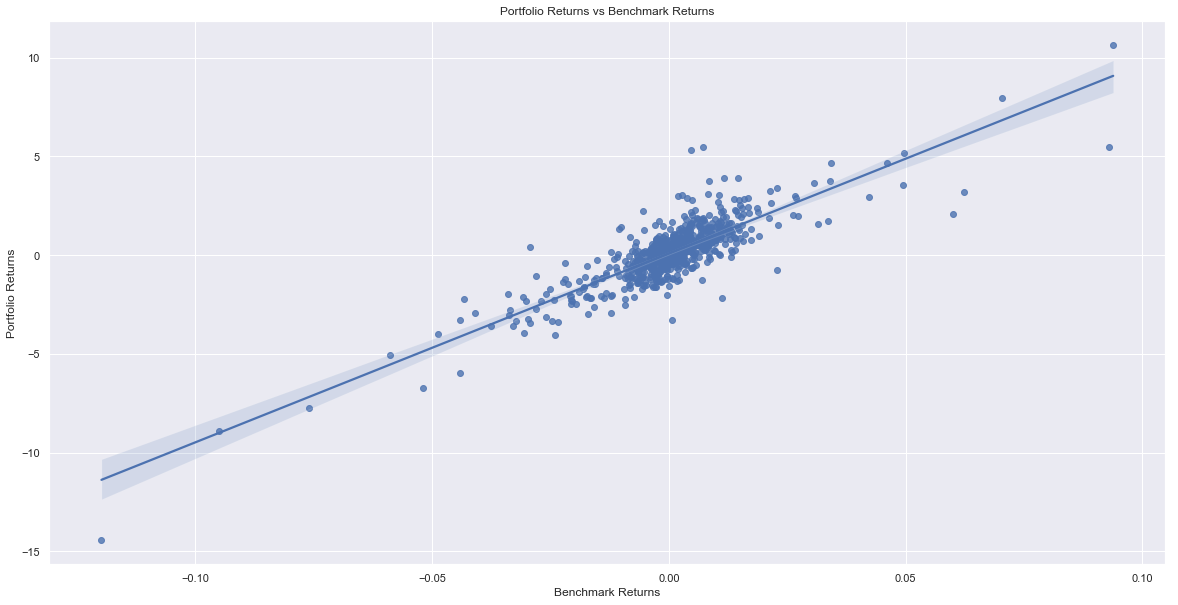

In [263]:
price_data = pdr.get_data_yahoo(tickers, start_date, end_date)

price_data = price_data['Adj Close']

ret_data = price_data.pct_change()[1:]

port_ret = (ret_data * wt).sum(axis = 1)

benchmark_price = pdr.get_data_yahoo('^GSPC',
                               start_date,
                               end_date)
                               
benchmark_ret = benchmark_price["Adj Close"].pct_change()[1:]

%matplotlib inline

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.regplot(benchmark_ret.values,
port_ret.values, ax=ax)
plt.xlabel("Benchmark Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()

In [264]:
(beta, alpha) = stats.linregress(benchmark_ret.values,
                port_ret.values)[0:2]
                
print("The portfolio beta is", round(beta, 4))
print("The portfolio alpha is", round(alpha,5))

The portfolio beta is 95.7481
The portfolio alpha is 0.09281


#### Capital Asset Pricing Model(CAPM)
* The Capital Asset Pricing Model describes the relationship between systematic risk and expected return for assets, particularly stocks. 
* Widely used for pricing risky securities and generating expected returns for assets given the risk of those assets and cost of capital.
* CAPM: Expected return of investment = Risk-free rate + Beta of investment(Expected return of market - Risk-free rate)'''''''Expected return of market - Risk-free rate= Market Risk Premium

In [265]:
capm = risk_free_rate + beta*.795
print(f" The Capital Asset Pricing Model score is {capm.round(2)}")

 The Capital Asset Pricing Model score is 76.12


In [266]:
from panel.interact import interact
import plotly.express as px
pn.extension('plotly')

In [5]:
def pf_properties():
    from finquant.portfolio import build_portfolio
    names = tickers
    pf = build_portfolio(names=names, data_api="yfinance")
    prop = pf.properties()
    return prop
    
def efficient_frontiers():
    opt_w, opt_res = pf.mc_optimisation(num_trials=5000)
    pf.mc_plot_results()
    pf.ef_plot_efrontier()
    pf.ef.plot_optimal_portfolios()
    pf.plot_stocks()
    return efficient_frontiers


def cap():
    capm = risk_free_rate + beta*.795
    return cap



def alpha_beta():
    (beta, alpha) = stats.linregress(benchmark_ret.values,
     port_ret.values)[0:2]
                
    print("The portfolio beta is", round(beta, 4))
    print("The portfolio alpha is", round(alpha,5))
    return pn.pane.Matplotlib(alpha_beta, tight=True)


def correlation():
    correlation =  daily_returns.corr()
    cm = sns.light_palette("green", as_cmap=True)
    s = correlation.style.background_gradient(cmap=cm)
    return s



def heatmap():
    from  matplotlib.colors import LinearSegmentedColormap
    cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 
    ax = sns.heatmap(correlation, cmap=cmap)
    return heatmap


def variance():
    assets.var()
    return variance


def sort_ratio():
    ab = pd.DataFrame(custom_portfolio)
    rfr = 0
    target = 0
    ab.loc[ab['Custom Portfolio'] < target, 'downside_returns'] = ab['Custom Portfolio']**2
    expected_return = ab['Custom Portfolio'].mean()
    down_stdev = np.sqrt(ab['downside_returns'].mean())
    sortino_ratio = (expected_return - rfr)/down_stdev
    return sort_ratio

def sharpe_ratio():
    sharpe_ratios = (daily_returns.mean()*252) / (daily_returns.std()*np.sqrt(252))
    sharpe_ratios.sort_values()
    return sharpe_ratio

def rolling_std():
    ds = daily_returns.rolling(window=63).std().plot()
    ds.set_title('63 Day Rolling Standard Deviation')
    return ds
    
def comb_ret():
    comb_returns = pd.concat([custom_portfolio, sp500_df], axis='columns', join='inner')
    comb_returns.head()
    return comb_ret
    
def wt_ret():
    weighted_returns = (wt * daily_returns)
    return wr_ret
    
def weighted_returns_plot():
    weight = weighted_returns.plot()
    wr.set_title('Weighted Returns')
    return weight
    
def all_return():
    all =  pd.concat([daily_returns, sp500_df], axis='columns', join='inner')
    return all
    
def cum_ret():
    cum = cumulative_returns=(1+all_returns).cumprod()-1
    plt.figure()
    plt.plot(cumulative_returns.iloc[:, 0:7], linewidth=1, alpha=0.7)
    plt.plot(cumulative_returns.iloc[:,-1], label="S&P500", linewidth=4, color='black', alpha=1) # Second plot combines first and second together
    cols = list(cumulative_returns.iloc[:, 0:7].columns)
    cols.append("S&P500")
    plt.legend(cols)
    plt.title('Cumulative Returns')
    return cum

def assets_plot():
    aspt = assets.plot()
    return aspt
    
    
def sp500_std():
    sp_std = sp500.std()
    return sp500_std

SyntaxError: 'return' outside function (<ipython-input-5-d753703db37c>, line 6)

In [276]:
df_col = pn.Column(
    "## Assessing Risk on Custom Portfolio Over Last 36 Months",
            correlation(),
            comb_ret(),
            wt_ret(),
            all_return(),
)

plots_col = pn.Column(
    efficient_frontiers(),
    heatmap(),
    rolling_std(),
    weighted_returns_plot(),
    cum_ret(),
    assets_plot(),
)

data_col = pn.Column(
    sp500_std(),
    sharpe_ratio(),
    sort_ratio(),
    variance(),
    alpha_beta(),
    cap(),
    prop(),
)




dashboard = pn.Tabs(
    ("Data Frames", df_col),
    ("Visualizations", plots_col ),
    ("Data", data_col ),
)

dashboard.servable()

NameError: name 'correlation' is not defined